In [1]:
import pickle


with open('trained_som.pkl', 'rb') as f:
    som = pickle.load(f)


In [2]:
som_array = som.get_weights()

In [3]:
som_array.shape

(150, 150, 128)

In [4]:
import numpy as np
original_array = np.load('thermal.npy', allow_pickle=True)
original_array.shape

(9139, 224, 224, 3)

In [5]:
with open('encoded_features.pkl', 'rb') as f:
    encoded_array= pickle.load(f)

In [6]:

encoded_array = encoded_array[:9139]
encoded_array.shape


(9139, 128)

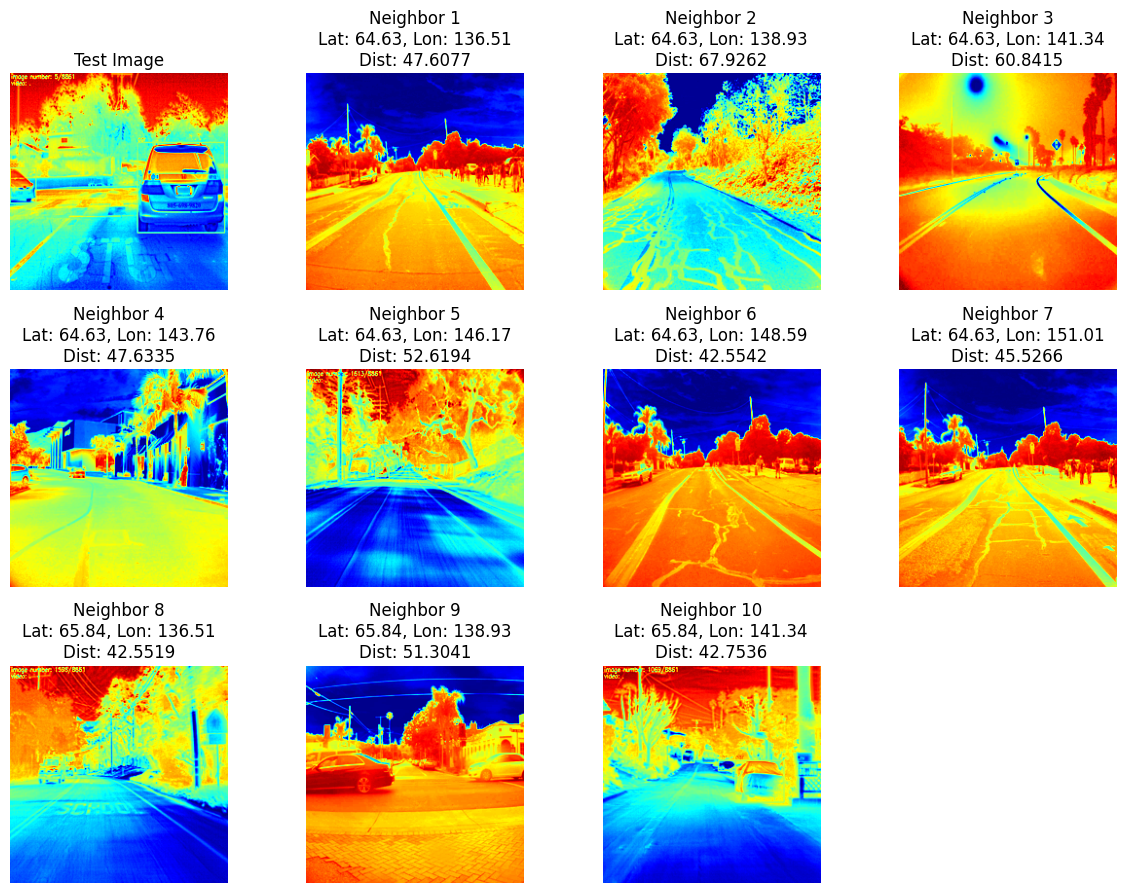

Neighbor 1 at Lat: 64.63, Lon: 136.51 has distance: 47.6077
Neighbor 2 at Lat: 64.63, Lon: 138.93 has distance: 67.9262
Neighbor 3 at Lat: 64.63, Lon: 141.34 has distance: 60.8415
Neighbor 4 at Lat: 64.63, Lon: 143.76 has distance: 47.6335
Neighbor 5 at Lat: 64.63, Lon: 146.17 has distance: 52.6194
Neighbor 6 at Lat: 64.63, Lon: 148.59 has distance: 42.5542
Neighbor 7 at Lat: 64.63, Lon: 151.01 has distance: 45.5266
Neighbor 8 at Lat: 65.84, Lon: 136.51 has distance: 42.5519
Neighbor 9 at Lat: 65.84, Lon: 138.93 has distance: 51.3041
Neighbor 10 at Lat: 65.84, Lon: 141.34 has distance: 42.7536


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean

latitude_min, latitude_max = -90, 90  
longitude_min, longitude_max = -180, 180  

som_width, som_height = som.get_weights().shape[:2]

latitudes = np.linspace(latitude_min, latitude_max, som_width)
longitudes = np.linspace(longitude_min, longitude_max, som_height)

test_image_idx = 5
test_image = encoded_array[test_image_idx]

winner_node = som.winner(test_image)

neighborhood_radius = 3

neighboring_nodes = []
for x in range(winner_node[0] - neighborhood_radius, winner_node[0] + neighborhood_radius + 1):
    for y in range(winner_node[1] - neighborhood_radius, winner_node[1] + neighborhood_radius + 1):
        if 0 <= x < som.get_weights().shape[0] and 0 <= y < som.get_weights().shape[1]:
            neighboring_nodes.append((x, y))

distances = []
for (x, y) in neighboring_nodes:
    neighbor_image = som.get_weights()[x, y].flatten()
    dist = euclidean(test_image.flatten(), neighbor_image)  
    distances.append(dist)

plt.figure(figsize=(12, 12))

plt.subplot(4, 4, 1)
plt.imshow(original_array[test_image_idx])  
plt.title("Test Image")
plt.axis("off")

for i, (node, dist) in enumerate(zip(neighboring_nodes[:10], distances[:10])):  
    x, y = node
    neighbor_image = som.get_weights()[x, y].flatten()
    
    closest_image_idx = np.argmin(np.linalg.norm(encoded_array - neighbor_image, axis=1))
    if closest_image_idx < original_array.shape[0]:
        original_neighbor_image = original_array[closest_image_idx] 
    else:
        print(f"Warning: Index {closest_image_idx} out of bounds, skipping neighbor {i+1}")
        continue
    
    lat = latitudes[x]
    lon = longitudes[y]
    
    plt.subplot(4, 4, i + 2)  
    plt.imshow(original_neighbor_image)  
    plt.title(f"Neighbor {i+1}\nLat: {lat:.2f}, Lon: {lon:.2f}\nDist: {dist:.4f}")
    plt.axis("off")

plt.tight_layout()  
plt.show()

for i, (node, dist) in enumerate(zip(neighboring_nodes[:10], distances[:10])):  
    x, y = node
    lat = latitudes[x]
    lon = longitudes[y]
    print(f"Neighbor {i+1} at Lat: {lat:.2f}, Lon: {lon:.2f} has distance: {dist:.4f}")
